# Ejemplo de uso climada


La data para este ejemplo fue obtenida desde la base de datos internacional de desastres EM-DAT (www.emdat.be) y adaptada para la versión de climada. Esta base de datos contiene los distintos eventos ocurridos en chile desde 1906.


## Fuente de Datos

International Disaster Database EM-DAT www.emdat.be

Download: https://public.emdat.be/

Número de registros: 143

##Funciones Importantesunctions
- clean_emdat_df: Lee CSV desde EM-DAT, limia el dataframe y lo carga.
- emdat_to_impact: Crea una instancia por impacto desde EM-DAT.
- emdat_countries_by_hazard: Obtiene lista de paises afectados por un tipo de evento (disaster (sub-)type) en EM-DAT.
- emdat_impact_yearlysum: crea un dataframe con el impacto sumado por país y por año


## Demo data

la data utilizada (demo_emdat_impact_data_chile.csv) contiene diversos tipos de eventos: terremotos, inundaciones, sequias, entre otros.

In [4]:
import sys
sys.path.append('/Users/jm/Documents/UTEM/climada/climada_python-2.1.1')

In [16]:
"""Load required packages and set path to CSV-file from EM-DAT"""

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from climada.util.constants import DEMO_DIR
from climada.engine.impact_data import emdat_countries_by_hazard, \
    emdat_impact_yearlysum, emdat_to_impact, clean_emdat_df

#emdat_file_path = DEMO_DIR.joinpath('demo_emdat_impact_data_2020.csv')
emdat_file_path = '/Users/jm/Documents/UTEM/climada/data/demo_emdat_impact_data_chile.csv'
print(emdat_file_path)

/Users/jm/Documents/UTEM/climada/data/demo_emdat_impact_data_chile.csv


### clean_emdat_df()


In [18]:
df = clean_emdat_df(emdat_file_path, countries=['Chile'], hazard=['Earthquake'], \
                            year_range=[1906, 2022])
print(df)

           Dis No  Year  Seq Disaster Group Disaster Subgroup Disaster Type  \
0   1906-0014-CHL  1906   14        Natural       Geophysical    Earthquake   
1   1922-0001-CHL  1922    1        Natural       Geophysical    Earthquake   
2   1928-0003-CHL  1928    3        Natural       Geophysical    Earthquake   
3   1939-0001-CHL  1939    1        Natural       Geophysical    Earthquake   
4   1943-0010-CHL  1943   10        Natural       Geophysical    Earthquake   
5   1946-0013-CHL  1946   13        Natural       Geophysical    Earthquake   
6   1949-0005-CHL  1949    5        Natural       Geophysical    Earthquake   
7   1949-0015-CHL  1949   15        Natural       Geophysical    Earthquake   
8   1953-0012-CHL  1953   12        Natural       Geophysical    Earthquake   
9   1953-0021-CHL  1953   21        Natural       Geophysical    Earthquake   
10  1958-0010-CHL  1958   10        Natural       Geophysical    Earthquake   
11  1960-0013-CHL  1960   13        Natural       Ge

### emdat_countries_by_hazard()

Listar los eventos correspondientes a un rango de años y una lista de países.

In [20]:
"""emdat_countries_by_hazard: get lists of countries impacted by tropical cyclones from 2010 to 2019"""

iso3_codes, country_names = emdat_countries_by_hazard(emdat_file_path, hazard='Earthquake', year_range=(2010, 2019))

print(country_names)
print(iso3_codes)

['Chile']
['CHL']


### emdat_to_impact()

Función que carga EM-DAT y retorna el impacto por evento o agregado.

In [30]:
"""Terremotos desde  2000 a 2021"""

impact_emdat, countries = emdat_to_impact(emdat_file_path, 'Earthquake', year_range=(2000,2021))

print('Número de terremotos en EM-DAT en Chile 2000 - 2021 %i' %(impact_emdat.event_id.size))
print('Promedio anual de daño monetario (AAI) por terremotos en EM-DAT 2000 a 2020: USD billion %2.2f' \
      %(impact_emdat.aai_agg/1e9))


Número de terremotos en EM-DAT en Chile 2000 - 2021 8
Promedio anual de daño monetario (AAI) por terremotos en EM-DAT 2000 a 2020: USD billion 1.48


Número de terremotos en EM-DAT en Chile 2000 - 2021: 8

Personas afectadas por terremotos en Chile 2000 - 2021 (por evento):
[  27645.       0.   25155. 2671556.   24297.  513387.  681499.     780.]

Personas afectadas por terremotos en Chile 2000 - 2021 (total):
179287


Text(0, 0.5, 'Personas Afectadas')

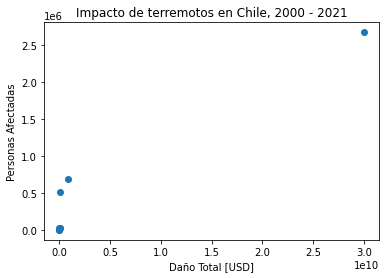

In [34]:
"""Total personas afectadas por terremoto en Chile 2000 - 2021:"""

#np.set_printoptions(supress=True) 

np.set_printoptions(suppress=True)

# People affected
impact_emdat_CHL, countries = emdat_to_impact(emdat_file_path, 'Earthquake', countries='Chile', \
                                    year_range=(2000,2021), imp_str="Total Affected")

print('Número de terremotos en EM-DAT en Chile 2000 - 2021: %i' \
      %(impact_emdat_CHL.event_id.size))
print('\nPersonas afectadas por terremotos en Chile 2000 - 2021 (por evento):')
print(impact_emdat_CHL.at_event)
print('\nPersonas afectadas por terremotos en Chile 2000 - 2021 (total):')
print(int(impact_emdat_CHL.aai_agg))
#"Risk measurement as average annual impact aggregated.

# Comparison to monetary damages:
impact_emdat_CHL_USD, _ = emdat_to_impact(emdat_file_path, 'Earthquake', countries='Chile', \
                                    year_range=(2000,2022))

ax = plt.scatter(impact_emdat_CHL_USD.at_event, impact_emdat_CHL.at_event)
plt.title('Impacto de terremotos en Chile, 2000 - 2021')
plt.xlabel('Daño Total [USD]')
plt.ylabel('Personas Afectadas')
#plt.xscale('log')
#plt.yscale('log')